<a href="https://colab.research.google.com/github/apurvv28/ML-Labs/blob/main/assignment_5_apurv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 5
#### Predict the price of the uber ride from the given pickup point to the agreed drop of location. Perform following tasks :
* Pre-process the dataset
* Identify the outliers
* Check the correlation
* Implement linear regression and ridge, lasso regression models
* Evaluate the models and compare their respective scores like R2, RMSE, MAE, etc.

##### By **Apurv Saktepar, Roll No. 11, SEDA Division, PRN - 1252090011**

1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

2. Cleaning the dataset

In [ ]:
df = pd.read_csv('uber.csv')
df = df.dropna()
df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1, inplace=True)

3. Displayed the clean dataset

In [ ]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


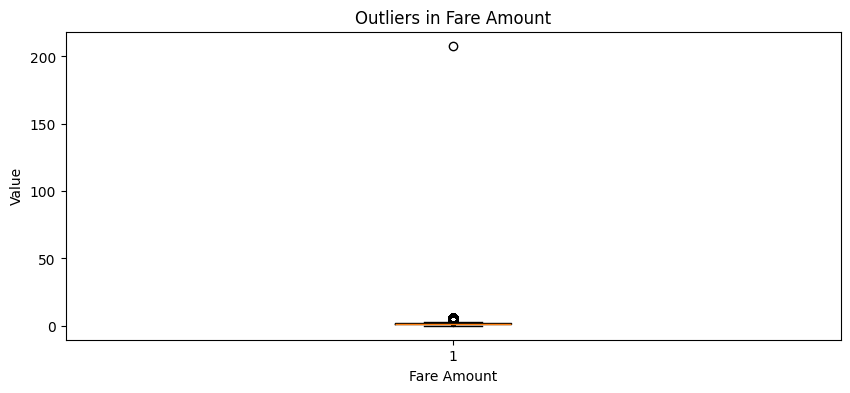

In [ ]:
plt.figure(figsize=(10, 4))
plt.boxplot(df['passenger_count'])
plt.title("Outliers in Fare Amount")
plt.xlabel("Fare Amount")
plt.ylabel("Value")
plt.show()

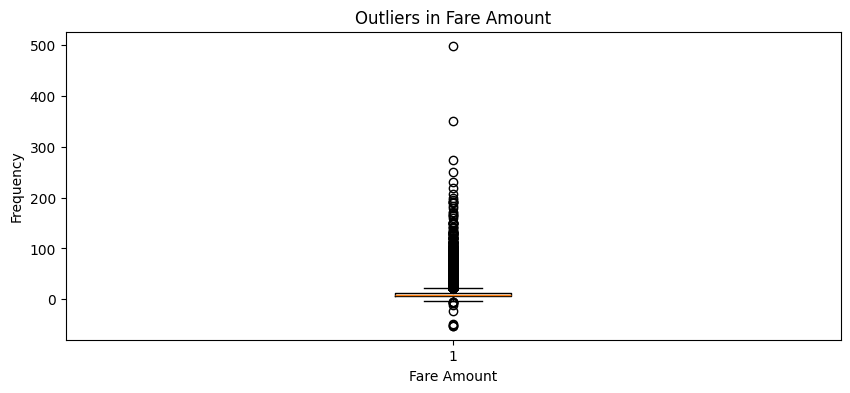

In [ ]:
plt.figure(figsize=(10, 4))
plt.boxplot(df['fare_amount'])
plt.title("Outliers in Fare Amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

Scatter Plot

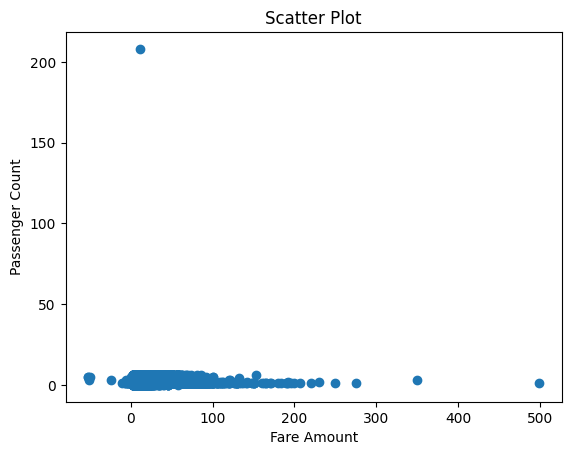

In [ ]:
plt.scatter(df['fare_amount'],df['passenger_count'])
plt.title("Scatter Plot")
plt.xlabel("Fare Amount")
plt.ylabel("Passenger Count")
plt.show()

4. Calculating the distance (did this to add a correlated feature)

In [ ]:
df['dist'] = np.sqrt(
    (df['dropoff_longitude'] - df['pickup_longitude'])**2 +
    (df['dropoff_latitude'] - df['pickup_latitude'])**2
)
print(df[['pickup_longitude', 'pickup_latitude', 'dist']].head())

   pickup_longitude  pickup_latitude      dist
0        -73.999817        40.738354  0.015140
1        -73.994355        40.728225  0.022103
2        -74.005043        40.740770  0.053109
3        -73.976124        40.790844  0.016528
4        -73.925023        40.744085  0.051031


5. Checking Correlation
* Correlation only works on numerical data

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,0.015140
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,0.022103
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0.053109
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,0.016528
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0.051031


* Pearson/Linear correlation

In [ ]:
linear = numeric_df.corr(method='pearson')
linear

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158,0.011424
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415,-0.181829
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559,0.431048
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033,-0.142754
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.063808
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000,-0.001604
dist,0.011424,-0.181829,0.431048,-0.142754,-0.063808,-0.001604,1.000000


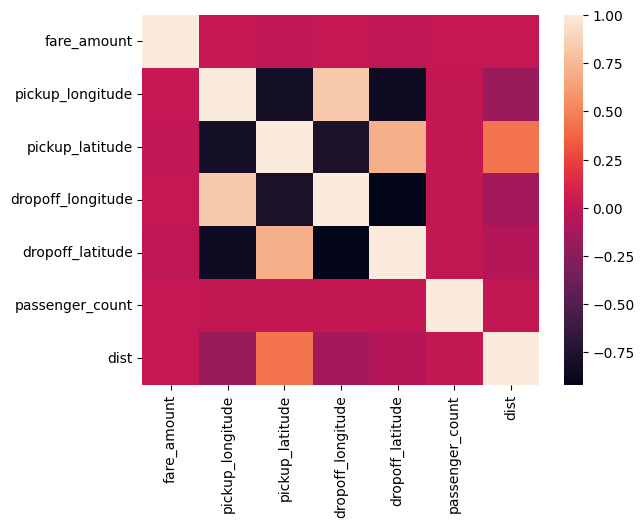

In [ ]:
sns.heatmap(linear)
plt.show()

* Montonic Correlation

In [ ]:
monotonic = numeric_df.corr(method='spearman')
monotonic

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
fare_amount,1.000000,0.042721,-0.073562,0.102393,-0.086520,0.023312,0.814676
pickup_longitude,0.042721,1.000000,0.513362,0.403647,0.215534,-0.016143,0.004086
pickup_latitude,-0.073562,0.513362,1.000000,0.196940,0.497906,-0.015744,-0.002956
dropoff_longitude,0.102393,0.403647,0.196940,1.000000,0.466194,-0.012854,0.085044
dropoff_latitude,-0.086520,0.215534,0.497906,0.466194,1.000000,-0.008742,0.004200
passenger_count,0.023312,-0.016143,-0.015744,-0.012854,-0.008742,1.000000,0.014015
dist,0.814676,0.004086,-0.002956,0.085044,0.004200,0.014015,1.000000


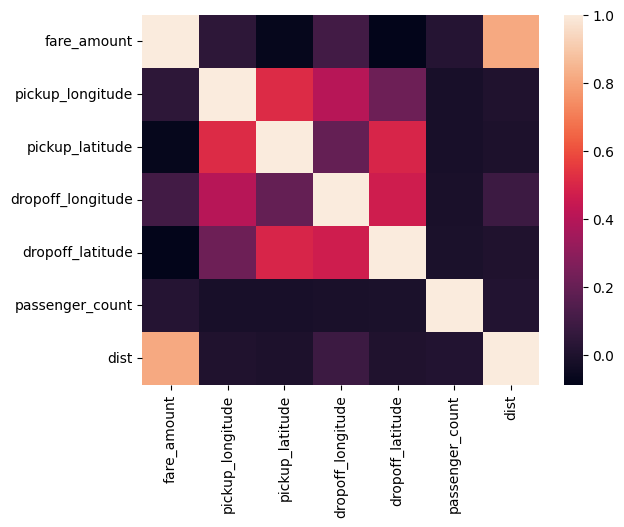

In [ ]:
sns.heatmap(monotonic)
plt.show()

* Rank Based Correlation


In [ ]:
rank = numeric_df.corr(method='kendall')
rank

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
fare_amount,1.000000,0.027605,-0.051093,0.069115,-0.059964,0.018233,0.668307
pickup_longitude,0.027605,1.000000,0.397296,0.283662,0.152557,-0.012528,0.003497
pickup_latitude,-0.051093,0.397296,1.000000,0.139899,0.357189,-0.012212,-0.004056
dropoff_longitude,0.069115,0.283662,0.139899,1.000000,0.366053,-0.009949,0.060523
dropoff_latitude,-0.059964,0.152557,0.357189,0.366053,1.000000,-0.006777,0.000674
passenger_count,0.018233,-0.012528,-0.012212,-0.009949,-0.006777,1.000000,0.010869
dist,0.668307,0.003497,-0.004056,0.060523,0.000674,0.010869,1.000000


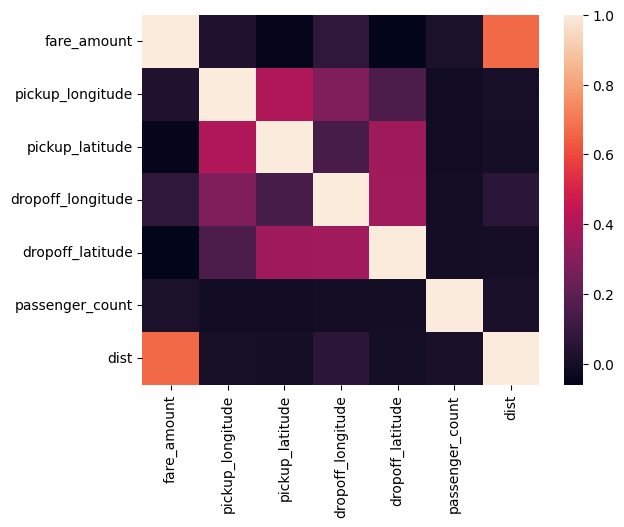

In [ ]:
sns.heatmap(rank)
plt.show()

6. Now Let's implement Regression Models on the dataset.
* Seperating target and features
* Spliting Dataset
* Feature Scalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#seperating features and target
X = df[[
    "pickup_longitude",
    "pickup_latitude",
    "dropoff_longitude",
    "dropoff_latitude",
    "dist"
]]

y = df["fare_amount"]

#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Linear Regression Score")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Score
MSE: 104.02510091835374
R2 Score: -1.1216763039501032e-05


* Ridge Regression

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("\nRidge Regression Score")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression Score
MSE: 104.02509829320186
R2 Score: -1.1191527002019086e-05


* Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("\nLasso Regression")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression
MSE: 104.02306708689868
R2 Score: 8.334809130317034e-06


* Comparison of Metrics of Regression Models

In [ ]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": lr.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})
coeff_df

,Feature,Linear,Ridge,Lasso
0,pickup_longitude,0.056556,0.056554,0.000000
1,pickup_latitude,-0.257628,-0.257618,-0.000000
2,dropoff_longitude,0.030352,0.030342,0.000000
3,dropoff_latitude,0.179308,0.179289,-0.000000
4,dist,0.273679,0.273669,0.020032


* Bar Graph for Comparison of models

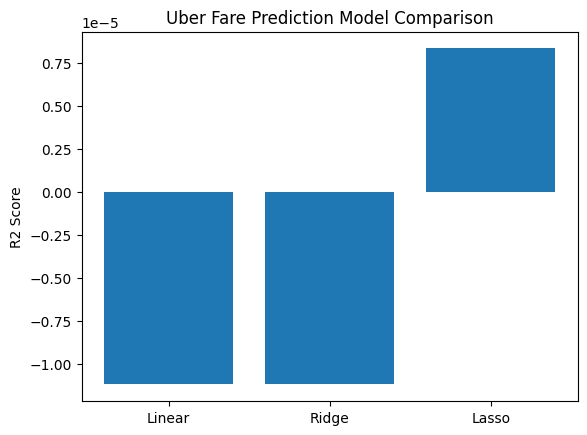

In [ ]:
models = ["Linear", "Ridge", "Lasso"]
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso)
]
plt.bar(models, r2_scores)
plt.ylabel("R2 Score")
plt.title("Uber Fare Prediction Model Comparison")
plt.show()

Linear Regression on sample datasets

In [ ]:
demo_data = {
    "x": [2, 4, 6],
    "y": [50, 55, 65]
}
df2 = pd.DataFrame(demo_data)
df2

,x,y
0,2,50
1,4,55
2,6,65


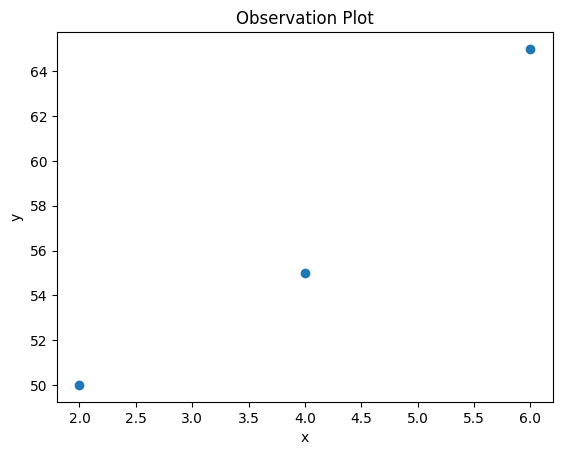

In [ ]:
plt.scatter(df2["x"], df2["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Observation Plot")
plt.show()

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df2[["x"]], df2["y"])
y_pred = lr.predict(df2[["x"]])
print(y_pred)

[49.16666667 56.66666667 64.16666667]


Scatter Plot and Heatmap

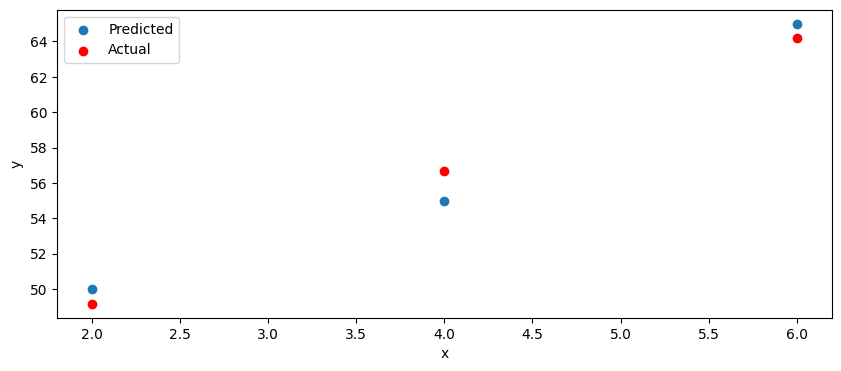

In [ ]:
plt.figure(figsize=(10, 4))
plt.scatter(df2["x"], df2["y"])
plt.scatter(df2["x"], y_pred, color="red")
plt.legend(["Predicted", "Actual"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

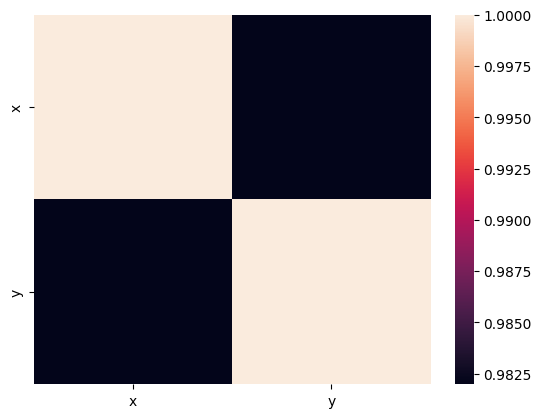

In [ ]:
sns.heatmap(df2.corr())
plt.show()

On Rainfall Dataset

In [ ]:
rainfall_data= {
    "rainfall": [12.3,13.7,14.5,11.2,13.2,14.1,12.0],
    "yeild":[6.25,8.92,8.42,5.27,7.21,8.71,5.68]
}
df3 = pd.DataFrame(rainfall_data)
df3

,rainfall,yeild
0,12.3,6.25
1,13.7,8.92
2,14.5,8.42
3,11.2,5.27
4,13.2,7.21
5,14.1,8.71
6,12.0,5.68


Text(0.5, 1.0, 'Observation Plot')

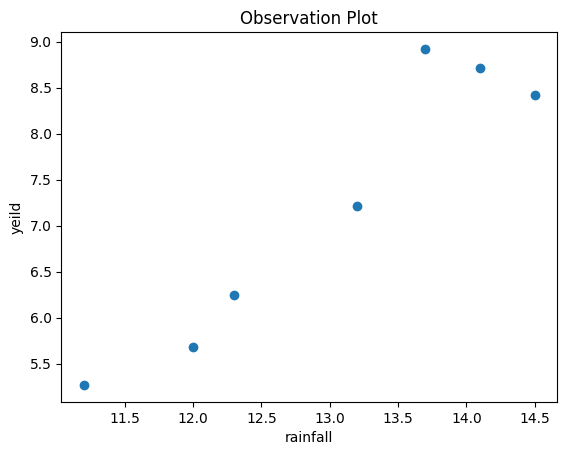

In [ ]:
plt.scatter(df3["rainfall"], df3["yeild"])
plt.xlabel("rainfall")
plt.ylabel("yeild")
plt.title("Observation Plot")

Implementing Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(df3[["rainfall"]], df3["yeild"])
y_pred1 = lr.predict(df3[["rainfall"]])
print(y_pred1)

[6.37724115 8.0399017  8.98999345 5.07086501 7.44609436 8.51494758
 6.02095675]


Plotting scatter plot

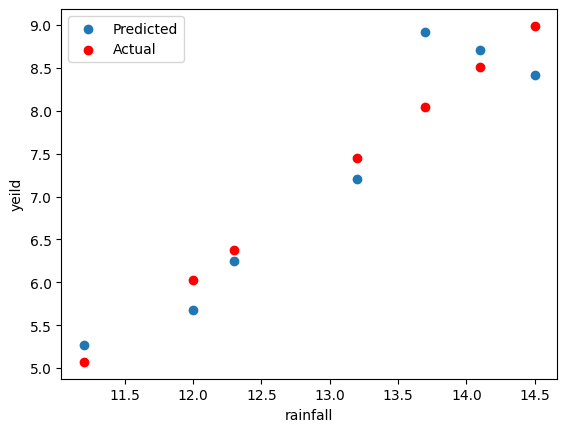

In [ ]:
plt.scatter(df3["rainfall"], df3["yeild"])
plt.scatter(df3["rainfall"], y_pred1, color="red")
plt.xlabel("rainfall")
plt.ylabel("yeild")
plt.legend(["Predicted", "Actual"])
plt.show()

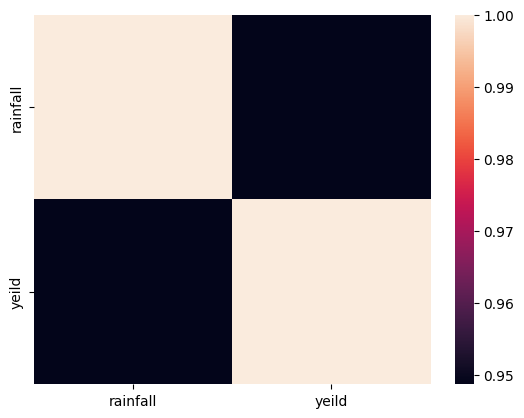

In [ ]:
sns.heatmap(df3.corr())
plt.show()

Computing metrics for evaluation of model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(df3["yeild"], y_pred1)
r2 = r2_score(df3["yeild"], y_pred1)
print("Mean Square Error = ",mse)
print("R2 Score = ",r2)

Mean Square Error =  0.1950497285152595
R2 Score =  0.9000790726895168


Here we have implemented few operations on an uber dataset and some operations on simple dataset. Firstly we cleaned the datset, then found the outliers and filtered them. Then we found out the correlations between the features and target variables and then implemented a linear regression model on it and compared the actual vs predicted values.